In [1]:
import pandas as pd #data analysis python
import numpy as np  #numerical python used in array
import matplotlib.pyplot as plt
import seaborn as sns #visualisation library for making chart ,plotting,graphs


In [2]:
dataframe = pd.read_csv("Zomato data .csv") #read or convert the csv file
print(dataframe.head())


                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [3]:
dataframe.tail()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining
147,Vijayalakshmi,Yes,No,3.9/5,47,200,Dining


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [5]:
#The handleRate function is designed to process a string that represents a rating in a format such as "4.5/5" and extract the numeric part before the slash, converting it to a float
def handleRate(value): #def=define , handlerate is func name
	value=str(value).split('/') #str(value) is used to convert the value into string,split() is used to convert or separate/ split a str into a list eg: from "4.5/5" to  ['4.5', '5']
	value=value[0]; #Converts it to a string, resulting in "4.5/5" & Splits it into ['4.5', '5']..
	return float(value)  #value[0] 0 is the index number, it takes the first element eg: from ['4.5', '5'] it takes only 4.5

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of restaurant')

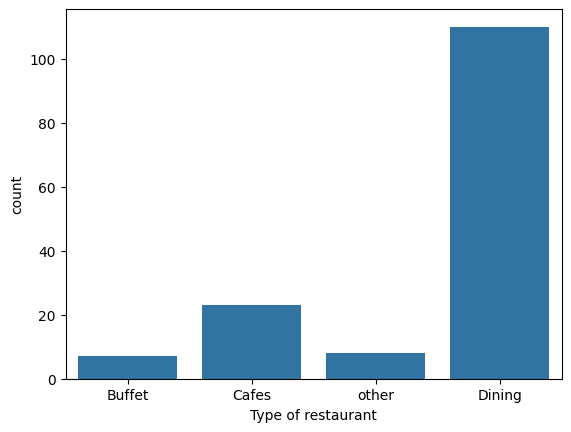

In [7]:
sns.countplot(x=dataframe['listed_in(type)']) #Counts the Categories: The countplot function counts the number of occurrences of each unique value in the 'listed_in(type)' column of the DataFrame.
plt.xlabel("Type of restaurant") #Labels the X-Axis: It labels the x-axis with "Type of restaurant", providing a description of what the categories along the x-axis represent.


In [8]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum() #dataframe.groupby('listed_in(type)'): This groups the rows of the DataFrame based on unique values in the 'listed_in(type)' column.
                                                                   #['votes'].sum(): For each group, this selects the 'votes' column and calculates the sum of the 'votes' in that group.
result = pd.DataFrame({'votes': grouped_data})
print(result)


                 votes
listed_in(type)       
Buffet            3028
Cafes             6434
Dining           20363
other             9367


Text(0, 0.5, 'votes')

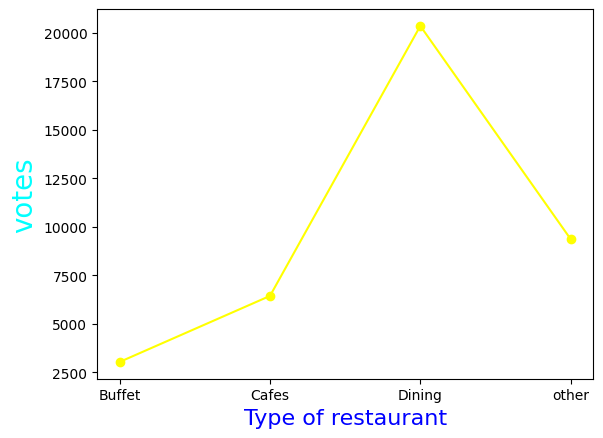

In [9]:
import matplotlib.pyplot as plt
plt.plot(result, c="yellow", marker="o")
plt.xlabel("Type of restaurant", c="Blue", size=16)
plt.ylabel("votes", c="Aqua", size=20)



In [10]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name'] #This line locates the row(s) in the DataFrame where the 'votes' column matches the max_votes value.
#It extracts the corresponding 'name' column values (i.e., the name(s) of the restaurant(s) with the maximum votes).

print("Restaurant(s) with the maximum votes:",restaurant_with_max_votes)
print(restaurant_with_max_votes)


Restaurant(s) with the maximum votes: 38    Empire Restaurant
Name: name, dtype: object
38    Empire Restaurant
Name: name, dtype: object


In [11]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='count'>

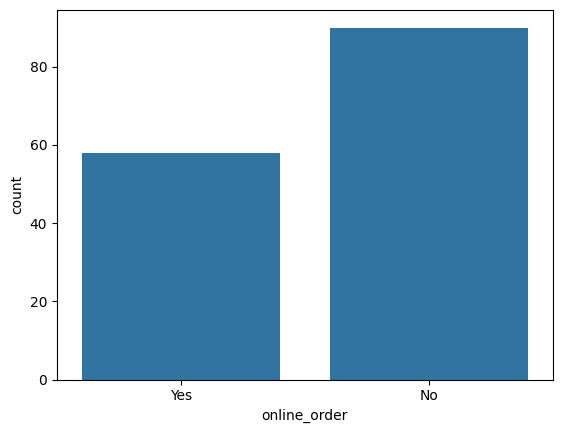

In [12]:
sns.countplot(x=dataframe['online_order'])


In [13]:
dataframe.value_counts('online_order')

online_order
No     90
Yes    58
Name: count, dtype: int64

Text(0.5, 1.0, 'Ratings Distribution')

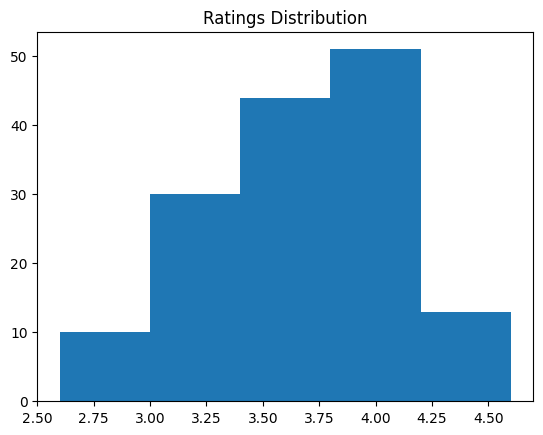

In [14]:
plt.hist(dataframe['rate'],bins=5) #hist = histogram ,bins=5 specifies that the data should be divided into 5 bins (intervals or ranges). Each bin will represent the frequency (or count) of data points that fall within that range.
plt.title("Ratings Distribution") #This line sets the title of the histogram to "Ratings Distribution".



<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

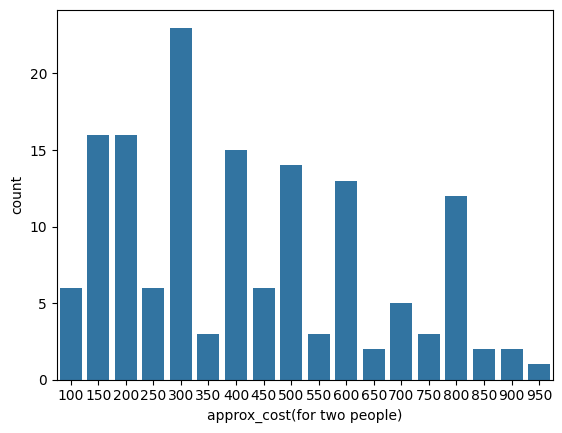

In [15]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)


<Axes: xlabel='online_order', ylabel='rate'>

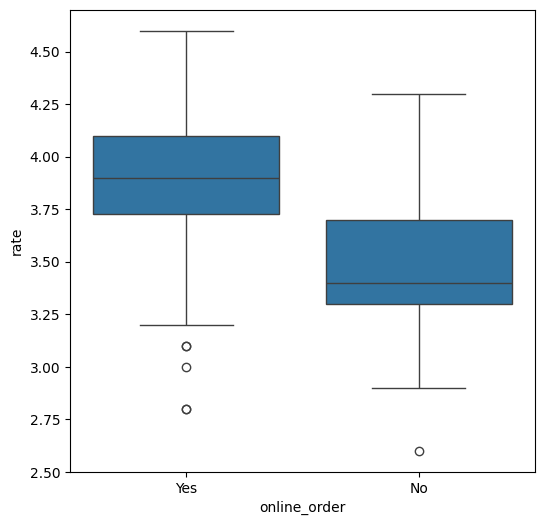

In [16]:
plt.figure(figsize = (6,6)) #This line creates a new figure with a specified size of 6x6 inches.
#figsize=(6,6) sets the width and height of the figure in inches.

sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)


Text(50.722222222222214, 0.5, 'Listed In (Type)')

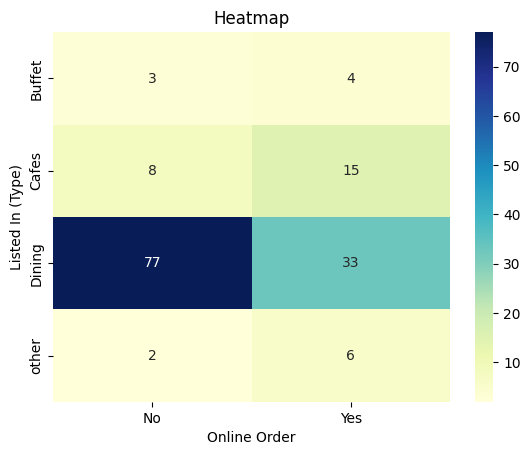

In [17]:
#a heatmap plot that visually represents the count of occurrences for each combination of 'listed_in(type)' (on the y-axis) and 'online_order' (on the x-axis). 
#aggfunc='size': Specifies that the aggregation function used to fill the pivot table cells will be 'size', which counts the number of occurrences of each combination of values.
#fill_value=0: Specifies that missing values (if any) in the pivot table will be filled with 0.
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
#The heatmap visualizes the pivot table data where each cell's color intensity represents the count of occurrences.
#Annotations (annot=True) display the exact count in each cell.
#cmap="YlGnBu": Specifies the color map to be used for the heatmap. Here, "YlGnBu" stands for Yellow-Green-Blue gradient.
#fmt='d': Specifies the format of the annotations as integers ('d' for decimal integer).
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")

